# -----------------------------
# Loading and Describing Orders Data
# -----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Analyst Assignment.xlsx"

# Loading the Excel file
xls = pd.ExcelFile(file_path)

df_orders = pd.read_excel(xls, sheet_name="sample_customer_orders")

In [2]:
df_orders

,customer_id,order_id,productId,sku,Order_date,productName,quantity,sellingPrice,vendor,productType
0,7262623487858,3996441377800,6.714214e+12,DFODF0016OR,2021-08-09 19:45:00,Orijen Large Puppy Dry Dog Food - 11.4kg,1,8499.0,Orijen,Product
1,7262623487858,4007320189960,6.725602e+12,DGRSC0005EB,2021-08-15 23:00:00,EarthBath Ultra-Mild Puppy Shampoo Wild Cherry...,2,1350.0,EarthBath,Product
2,7262623487858,4012803357704,6.714214e+12,DFODF0003AC,2021-08-18 16:14:00,Acana Puppy Small Breed Dry Food - 6kg,1,3799.0,Acana,Product
3,7262623487858,4081550162952,6.716705e+12,DFODF0022PG,2021-09-23 18:06:00,Pedigree Chicken & Vegetables Adult Dry Dog Fo...,1,86.0,Pedigree,Product
4,7262623487858,4110001306632,6.721531e+12,DFOWF0018KK,2021-10-07 00:11:00,Kennel Kitchen Supreme Cuts in Gravy - Fish Re...,1,51.0,Products,Product
...,...,...,...,...,...,...,...,...,...,...
500007,8820009686963,5747451296841,8.126665e+12,DFOPF0031PGREW,2024-04-17 10:32:00,Pedigree Meat & Milk Puppy Dry Food - 2.8kg,1,532.0,Pedigree,Sample
500008,8820009686963,5747451296841,8.363304e+12,DTOCT0008PTVREW,2024-04-17 10:32:00,Pet Vogue Sandal Shaped Rope Toy for Dogs (Yel...,1,152.0,Pet Vogue,Sample
500009,8820009686963,5747451296841,6.700556e+12,DFODF0084DR,2024-04-17 10:32:00,Drools Chicken and Egg Adult Dog Dry Food - 3kg,5,628.0,Drools,Product
500010,8820009686963,5747451296841,6.700556e+12,DFODF0065DR,2024-04-17 10:32:00,Drools Chicken and Egg Adult Dog Dry Food - 1.2kg,10,250.0,Drools,Product


In [3]:
df_orders.describe()

,customer_id,order_id,productId,Order_date,quantity,sellingPrice
count,5.000120e+05,5.000120e+05,4.967940e+05,500012,500012.000000,500012.000000
mean,8.312064e+12,5.408886e+12,7.417152e+12,2023-08-09 20:45:41.638041088,1.181104,926.060529
min,7.262623e+12,3.801392e+12,6.676713e+12,2021-05-13 18:02:00,1.000000,0.000000
25%,8.102631e+12,5.239022e+12,6.746645e+12,2023-03-29 21:26:00,1.000000,108.000000
50%,8.337105e+12,5.456860e+12,7.617711e+12,2023-09-05 13:08:00,1.000000,425.000000
75%,8.566704e+12,5.658748e+12,7.962532e+12,2024-02-09 13:38:00,1.000000,1080.000000
max,8.820010e+12,5.849486e+12,8.562447e+12,2024-06-26 20:01:00,3743.000000,793800.000000
std,3.389111e+11,3.193594e+11,5.675239e+11,NaN,5.845628,2340.532779


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500012 entries, 0 to 500011
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   customer_id   500012 non-null  int64         
 1   order_id      500012 non-null  int64         
 2   productId     496794 non-null  float64       
 3   sku           497387 non-null  object        
 4   Order_date    500012 non-null  datetime64[ns]
 5   productName   500012 non-null  object        
 6   quantity      500012 non-null  int64         
 7   sellingPrice  500012 non-null  float64       
 8   vendor        499123 non-null  object        
 9   productType   500012 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 38.1+ MB


In [5]:
df_orders.isnull().mean()*100

customer_id     0.000000
order_id        0.000000
productId       0.643585
sku             0.524987
Order_date      0.000000
productName     0.000000
quantity        0.000000
sellingPrice    0.000000
vendor          0.177796
productType     0.000000
dtype: float64

## Orders dataset has very small amount of missing values hence it will be dropped from productId, SKU, vendor

In [6]:
# Drop rows missing critical information in orders
df_orders = df_orders.dropna(subset=[ "productId", "sku", "vendor"])


In [7]:
df_orders.isnull().mean()*100

customer_id     0.0
order_id        0.0
productId       0.0
sku             0.0
Order_date      0.0
productName     0.0
quantity        0.0
sellingPrice    0.0
vendor          0.0
productType     0.0
dtype: float64

In [8]:
df_orders.duplicated().value_counts()

False    495109
True        430
Name: count, dtype: int64

## Removing the duplicates present in the Orders dataset

In [9]:
df_orders.drop_duplicates(inplace= True)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21540\2827369088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders.drop_duplicates(inplace= True)


In [10]:
df_orders.duplicated().value_counts()

False    495109
Name: count, dtype: int64

## Converting Order_date to datetime and dropping rows where the conversion fails

In [11]:
df_orders["Order_date"] = pd.to_datetime(df_orders["Order_date"], errors="coerce")
df_orders = df_orders.dropna(subset=["Order_date"])

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21540\3555636035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders["Order_date"] = pd.to_datetime(df_orders["Order_date"], errors="coerce")


# -------------------------------------------------
# Loading and Describing SampleProduct Dataset
# -------------------------------------------------

In [12]:
df_samples = pd.read_excel(xls, sheet_name="sampleProductMapping")

In [13]:
df_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sampleProductId  984 non-null    int64
 1   parentProductId  984 non-null    int64
dtypes: int64(2)
memory usage: 15.5 KB


In [14]:
df_samples.isnull().mean()

sampleProductId    0.0
parentProductId    0.0
dtype: float64

In [15]:
df_samples.duplicated().value_counts()

False    984
Name: count, dtype: int64

In [16]:
# Dropping rows with missing sample mapping values
df_samples = df_samples.dropna(subset=["sampleProductId", "parentProductId"])


In [17]:
# Rename columns for clarity
df_samples.rename(columns={"sampleProductId": "sample_productId", "parentProductId": "parent_productId"}, inplace=True)

# -----------------------------------
# Identifying Sample Orders
# -----------------------------------

In [18]:
# Merging orders with the sample mapping to flag orders representing sample products
df_orders_samples = df_orders.merge(df_samples, left_on="productId", right_on="sample_productId", how="left")

In [19]:
# Filtering rows corresponding to sample orders (non-missing sample_productId)
samples = df_orders_samples[df_orders_samples["sample_productId"].notna()].copy()

## Renaming columns in the sample orders for better understanding & readibilty

In [20]:
samples.rename(columns={
    "Order_date": "Order_date_sample",
    "vendor": "vendor_sample",
    "productId": "productId_sample"
}, inplace=True)

# ----------------------------------------------------
# Tracking Conversions (Full-Size Product Purchases)
# ----------------------------------------------------

In [21]:
# Merging sample orders with all orders for the same customer (to capture later purchase events)
merged = samples.merge(df_orders, on="customer_id", suffixes=("_sample", "_purchase"))

In [22]:
# For better understanding, ensuring purchase order columns are well named
if "productId" in merged.columns and "productId_purchase" not in merged.columns:
    merged.rename(columns={"productId": "productId_purchase"}, inplace=True)
    
if "Order_date" in merged.columns and "Order_date_purchase" not in merged.columns:
    merged.rename(columns={"Order_date": "Order_date_purchase"}, inplace=True)

if "vendor" in merged.columns and "vendor_purchase" not in merged.columns:
    merged.rename(columns={"vendor": "vendor_purchase"}, inplace=True)

## Data Visualizations

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21540\2004209475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


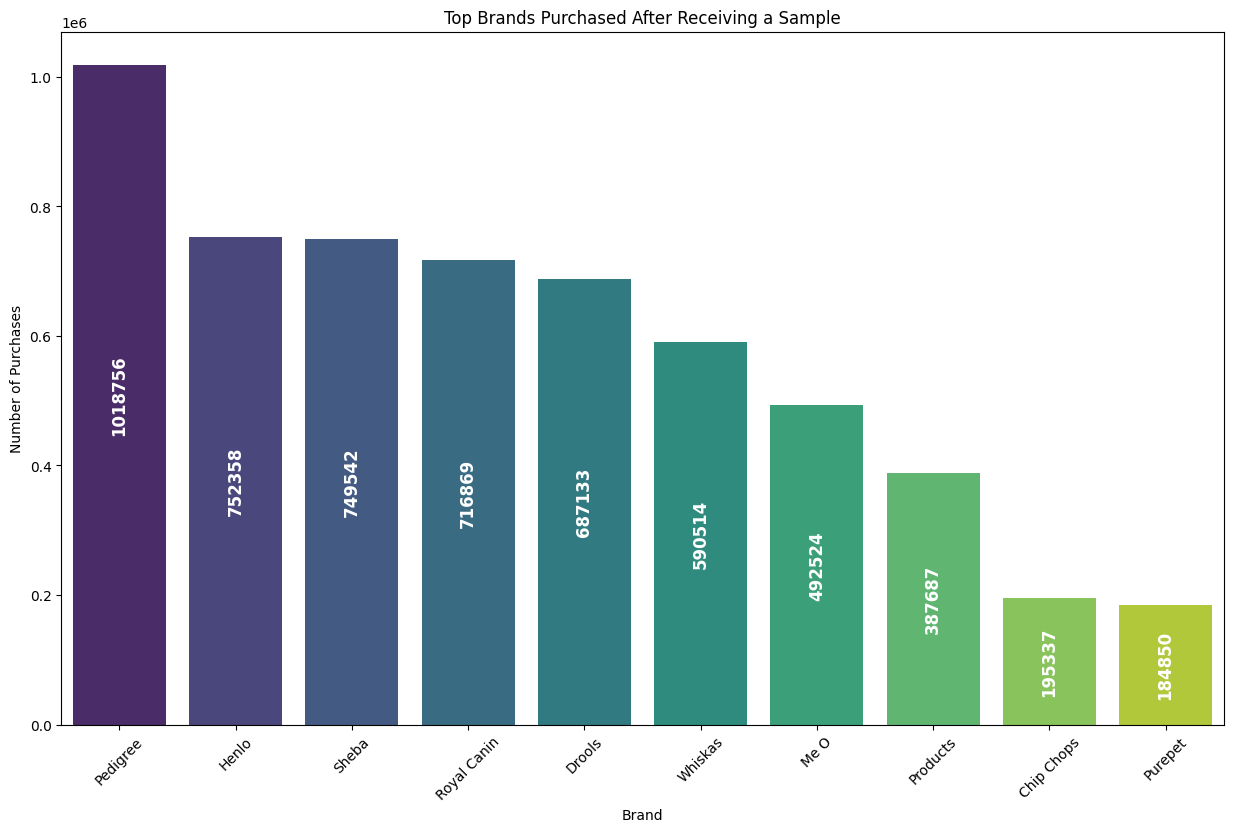

In [53]:
plt.figure(figsize=(15,9))


brand_counts = merged['vendor_purchase'].value_counts().head(10)


ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center',
                fontsize=12, fontweight='bold', color='white',
                rotation=90)


plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Number of Purchases")
plt.title("Top Brands Purchased After Receiving a Sample")


plt.show()

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21540\442106784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sampled_products.index, y=sampled_products.values, palette="coolwarm")


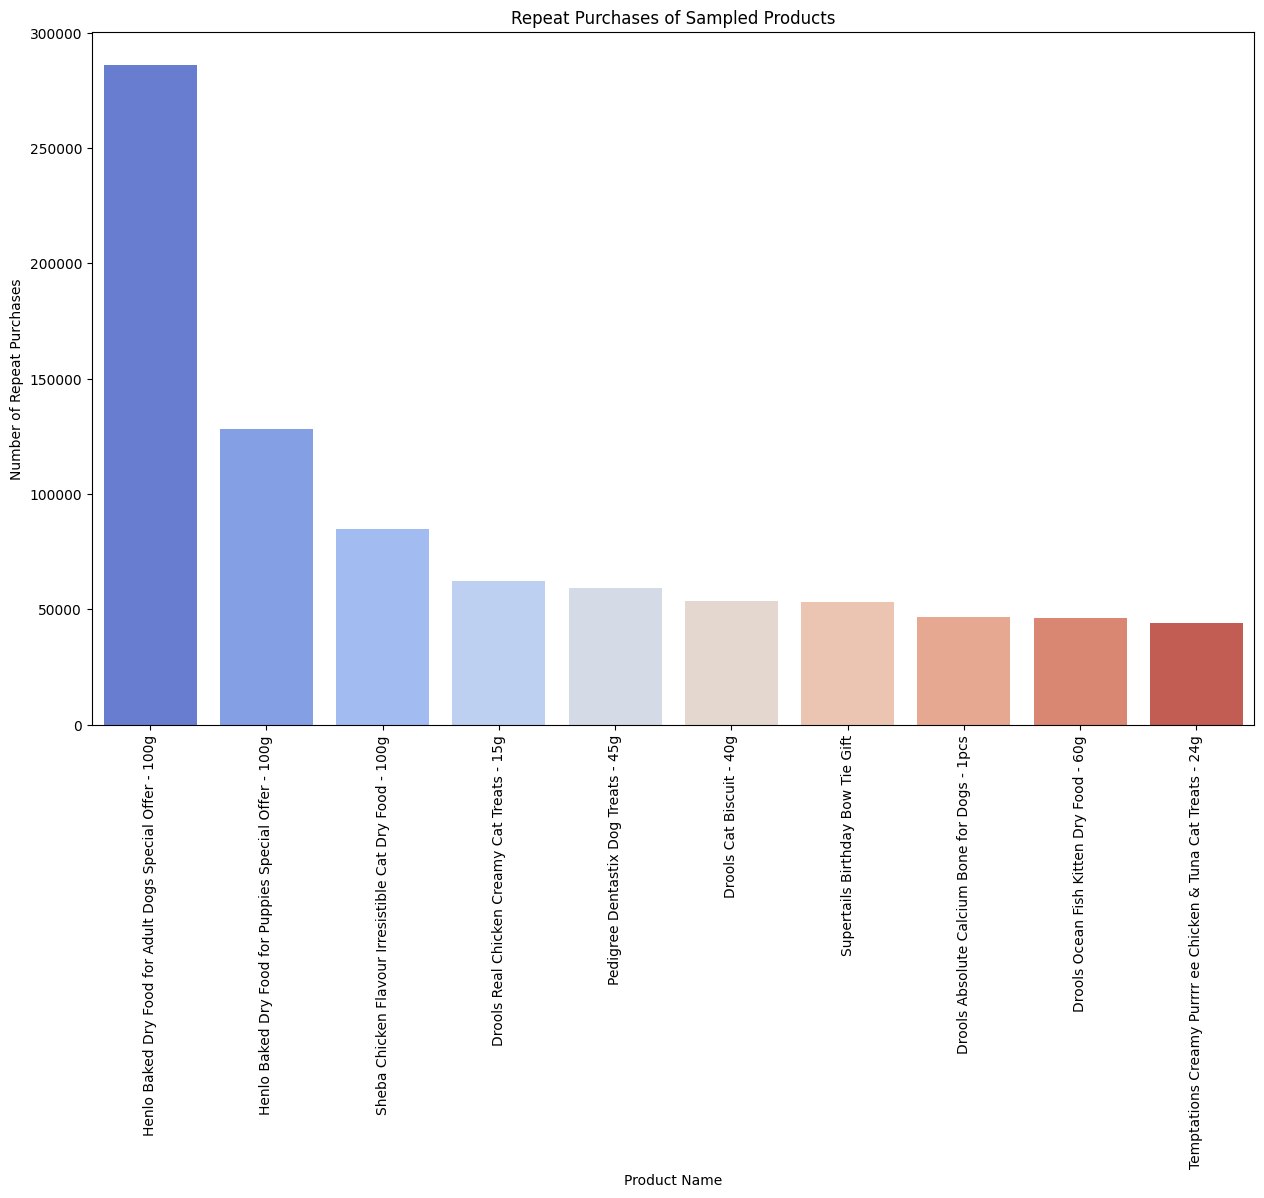

In [24]:
#Repeat purchases of sampled products
sampled_products = merged.groupby("productName_purchase")["customer_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,9))
sns.barplot(x=sampled_products.index, y=sampled_products.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Product Name")
plt.ylabel("Number of Repeat Purchases")
plt.title("Repeat Purchases of Sampled Products")
plt.show()

In [25]:
merged. head()

,customer_id,order_id_sample,productId_sample,sku_sample,Order_date_sample,productName_sample,quantity_sample,sellingPrice_sample,vendor_sample,productType_sample,...,parent_productId,order_id_purchase,productId_purchase,sku_purchase,Order_date_purchase,productName_purchase,quantity_purchase,sellingPrice_purchase,vendor_purchase,productType_purchase
0,7262623487858,5285575228489,7.959940e+12,DFODF0016SAM,2023-04-27 22:37:00,Royal Canin Sterilised 37 Adult Cat Dry Food,1,0.0,Royal Canin,Sample,...,6.720713e+12,3996441377800,6.714214e+12,DFODF0016OR,2021-08-09 19:45:00,Orijen Large Puppy Dry Dog Food - 11.4kg,1,8499.0,Orijen,Product
1,7262623487858,5285575228489,7.959940e+12,DFODF0016SAM,2023-04-27 22:37:00,Royal Canin Sterilised 37 Adult Cat Dry Food,1,0.0,Royal Canin,Sample,...,6.720713e+12,4007320189960,6.725602e+12,DGRSC0005EB,2021-08-15 23:00:00,EarthBath Ultra-Mild Puppy Shampoo Wild Cherry...,2,1350.0,EarthBath,Product
2,7262623487858,5285575228489,7.959940e+12,DFODF0016SAM,2023-04-27 22:37:00,Royal Canin Sterilised 37 Adult Cat Dry Food,1,0.0,Royal Canin,Sample,...,6.720713e+12,4012803357704,6.714214e+12,DFODF0003AC,2021-08-18 16:14:00,Acana Puppy Small Breed Dry Food - 6kg,1,3799.0,Acana,Product
3,7262623487858,5285575228489,7.959940e+12,DFODF0016SAM,2023-04-27 22:37:00,Royal Canin Sterilised 37 Adult Cat Dry Food,1,0.0,Royal Canin,Sample,...,6.720713e+12,4081550162952,6.716705e+12,DFODF0022PG,2021-09-23 18:06:00,Pedigree Chicken & Vegetables Adult Dry Dog Fo...,1,86.0,Pedigree,Product
4,7262623487858,5285575228489,7.959940e+12,DFODF0016SAM,2023-04-27 22:37:00,Royal Canin Sterilised 37 Adult Cat Dry Food,1,0.0,Royal Canin,Sample,...,6.720713e+12,4110001306632,6.721531e+12,DFOWF0018KK,2021-10-07 00:11:00,Kennel Kitchen Supreme Cuts in Gravy - Fish Re...,1,51.0,Products,Product


In [26]:
# A conversion is when the purchased product (productId_purchase) matches the full product (parent_productId) corresponding to the sample.
conversions = merged[merged["productId_purchase"] == merged["parent_productId"]].copy()

In [27]:
# Dropping rows with missing order dates in the conversion data
conversions = conversions.dropna(subset=["Order_date_sample", "Order_date_purchase"])


In [28]:
# Calculating conversion time (in days) – only considering the cases where the purchase has occured after the sample orders.
conversions["conversion_time"] = (conversions["Order_date_purchase"] - conversions["Order_date_sample"]).dt.days
conversions = conversions[conversions["conversion_time"] >= 0]

# -------------------------------------
# Calculating the required Metrics
# -------------------------------------

### 1. Average Conversion Time: The average number of days between receiving the sample and purchasing the full-size product.

In [29]:
avg_conversion_time = conversions["conversion_time"].mean()
print("Average Conversion Time (days):", round(avg_conversion_time, 0))

Average Conversion Time (days): 132.0


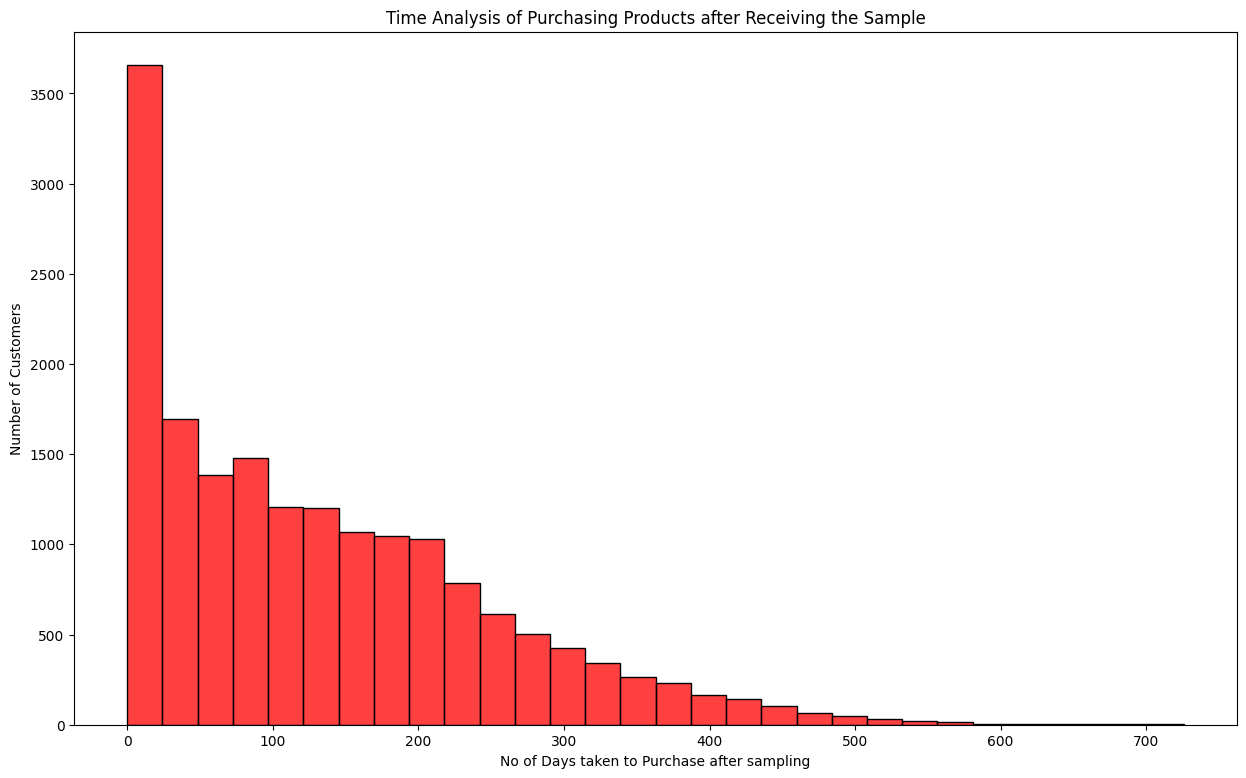

In [30]:
plt.figure(figsize=(15,9))
sns.histplot(conversions["conversion_time"].dropna(), bins=30, color="red")
plt.xlabel("No of Days taken to Purchase after sampling")
plt.ylabel("Number of Customers")
plt.title("Time Analysis of Purchasing Products after Receiving the Sample")
plt.show()

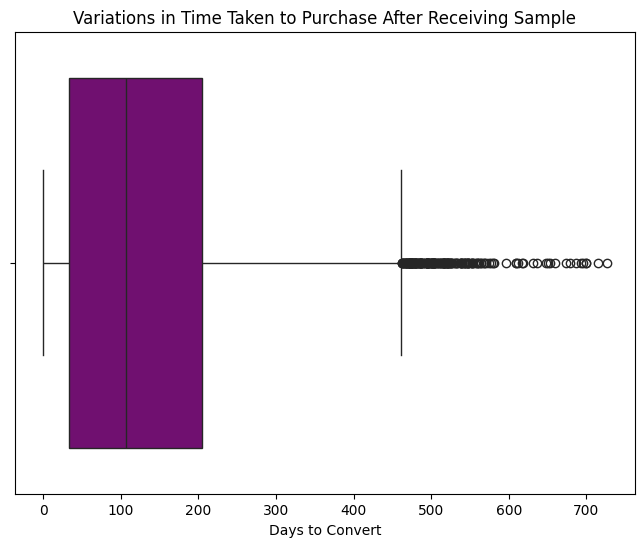

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x=conversions["conversion_time"].dropna(), color="purple")
plt.xlabel("Days to Convert")
plt.title("Variations in Time Taken to Purchase After Receiving Sample")
plt.show()

## Correlation Between Key Numerical Features

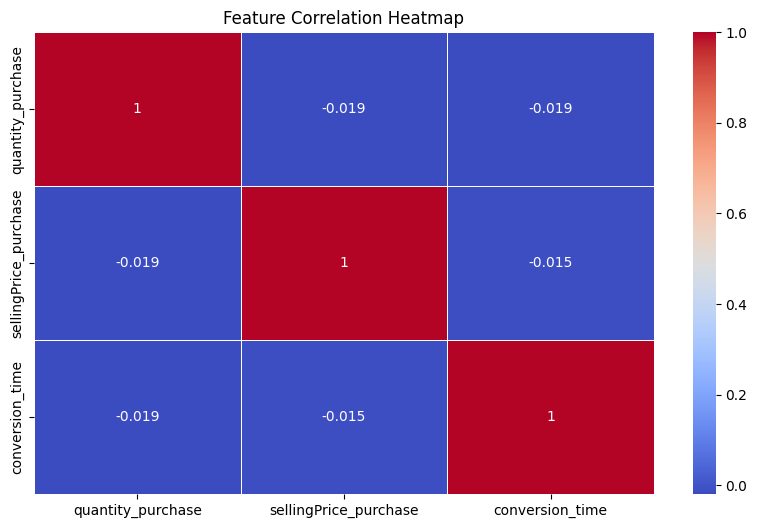

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(conversions[['quantity_purchase', 'sellingPrice_purchase', 'conversion_time']].corr(), annot=True, cmap='coolwarm', linewidths=0.7)
plt.title("Feature Correlation Heatmap")
plt.show()

### 2. Brand Attachment: The percentage of conversions where the vendor (brand) in the sample orders is same as the vendor in the purchase orders.

In [35]:
conversions["same_brand"] = conversions["vendor_sample"] == conversions["vendor_purchase"]
brand_attachment_rate = conversions["same_brand"].mean() * 100
print("Brand Attachment Rate (%):", round(brand_attachment_rate, 2))

Brand Attachment Rate (%): 92.22


### 3. Product Attachment: The Amount(%) of unique customers who received a sample and later purchased the full-size products.

In [36]:
product_attachment_rate = (conversions["customer_id"].nunique() / samples["customer_id"].nunique()) * 100
print("Product Attachment Rate (%):", round(product_attachment_rate, 2))

Product Attachment Rate (%): 19.81
